In [1]:
import numpy as np
from Dataset import Neural_Data

neural_data = Neural_Data("/home/amy/Documents/Research/Makin/data/josh_data/TIMIT_wav_rescaled","191121")

Data from 63 channels loaded...!


In [ ]:
repeated_sents = {}
for i in range(499):
    data = neural_data.retrieve_spikes_count_for_all_trials(i, w=100)
    if data[1].shape[0] > 1:
        repeated_sents[i] = data[1].shape
print(repeated_sents)

In [ ]:
repeated_sents.keys()

In [24]:
from scipy import stats
import matplotlib.pyplot as plt
import csv
# print(channel.shape)

sents = [12,13,32,43,56,163,212,218,287,308]
# sents = [32]
# sent_vals = {}
wins = [1,5,10,20,30,40,50,75,100,200]
# wins = [1]
for w in wins:
    for sent in sents:
        data = neural_data.retrieve_spikes_count_for_all_trials(sent, w=w)

        for j in range(len(data)):
            channel = data[j]
            # print(channel.shape)
            cnt = 0
            val = []
            p_r = []
            for shift in [1, 5, 10]:
                for i in range(11):
                    cnt+=1.0
                    ind = np.arange(0,11,1)
                    b_ind = ind[i]
                    a_ind = np.delete(ind, i)
                    
                    a = np.mean(channel[a_ind, :], axis=0)
                    b = channel[b_ind,:]
                    b = np.roll(b, shift)
                    
                    res = stats.linregress(a, b)
                    pearson_r = stats.pearsonr(a, b)
                    val.append(res.rvalue**2)
                    p_r.append(pearson_r[0]**2)

                with open("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_cs_win_" + str(w)+ "_"+ str(sent) +"_" + str(shift)+".csv", 'a') as f:
                    writer=csv.writer(f)
                    row = [j+1, sum(val)/cnt, sum(p_r)/cnt]
                    writer.writerow(row)
                    f.close()
    print("done: ", w)


/home/amy/anaconda3/envs/research/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


done:  1
done:  5
done:  10
done:  20
done:  30
done:  40
done:  50
done:  75
done:  100
done:  200


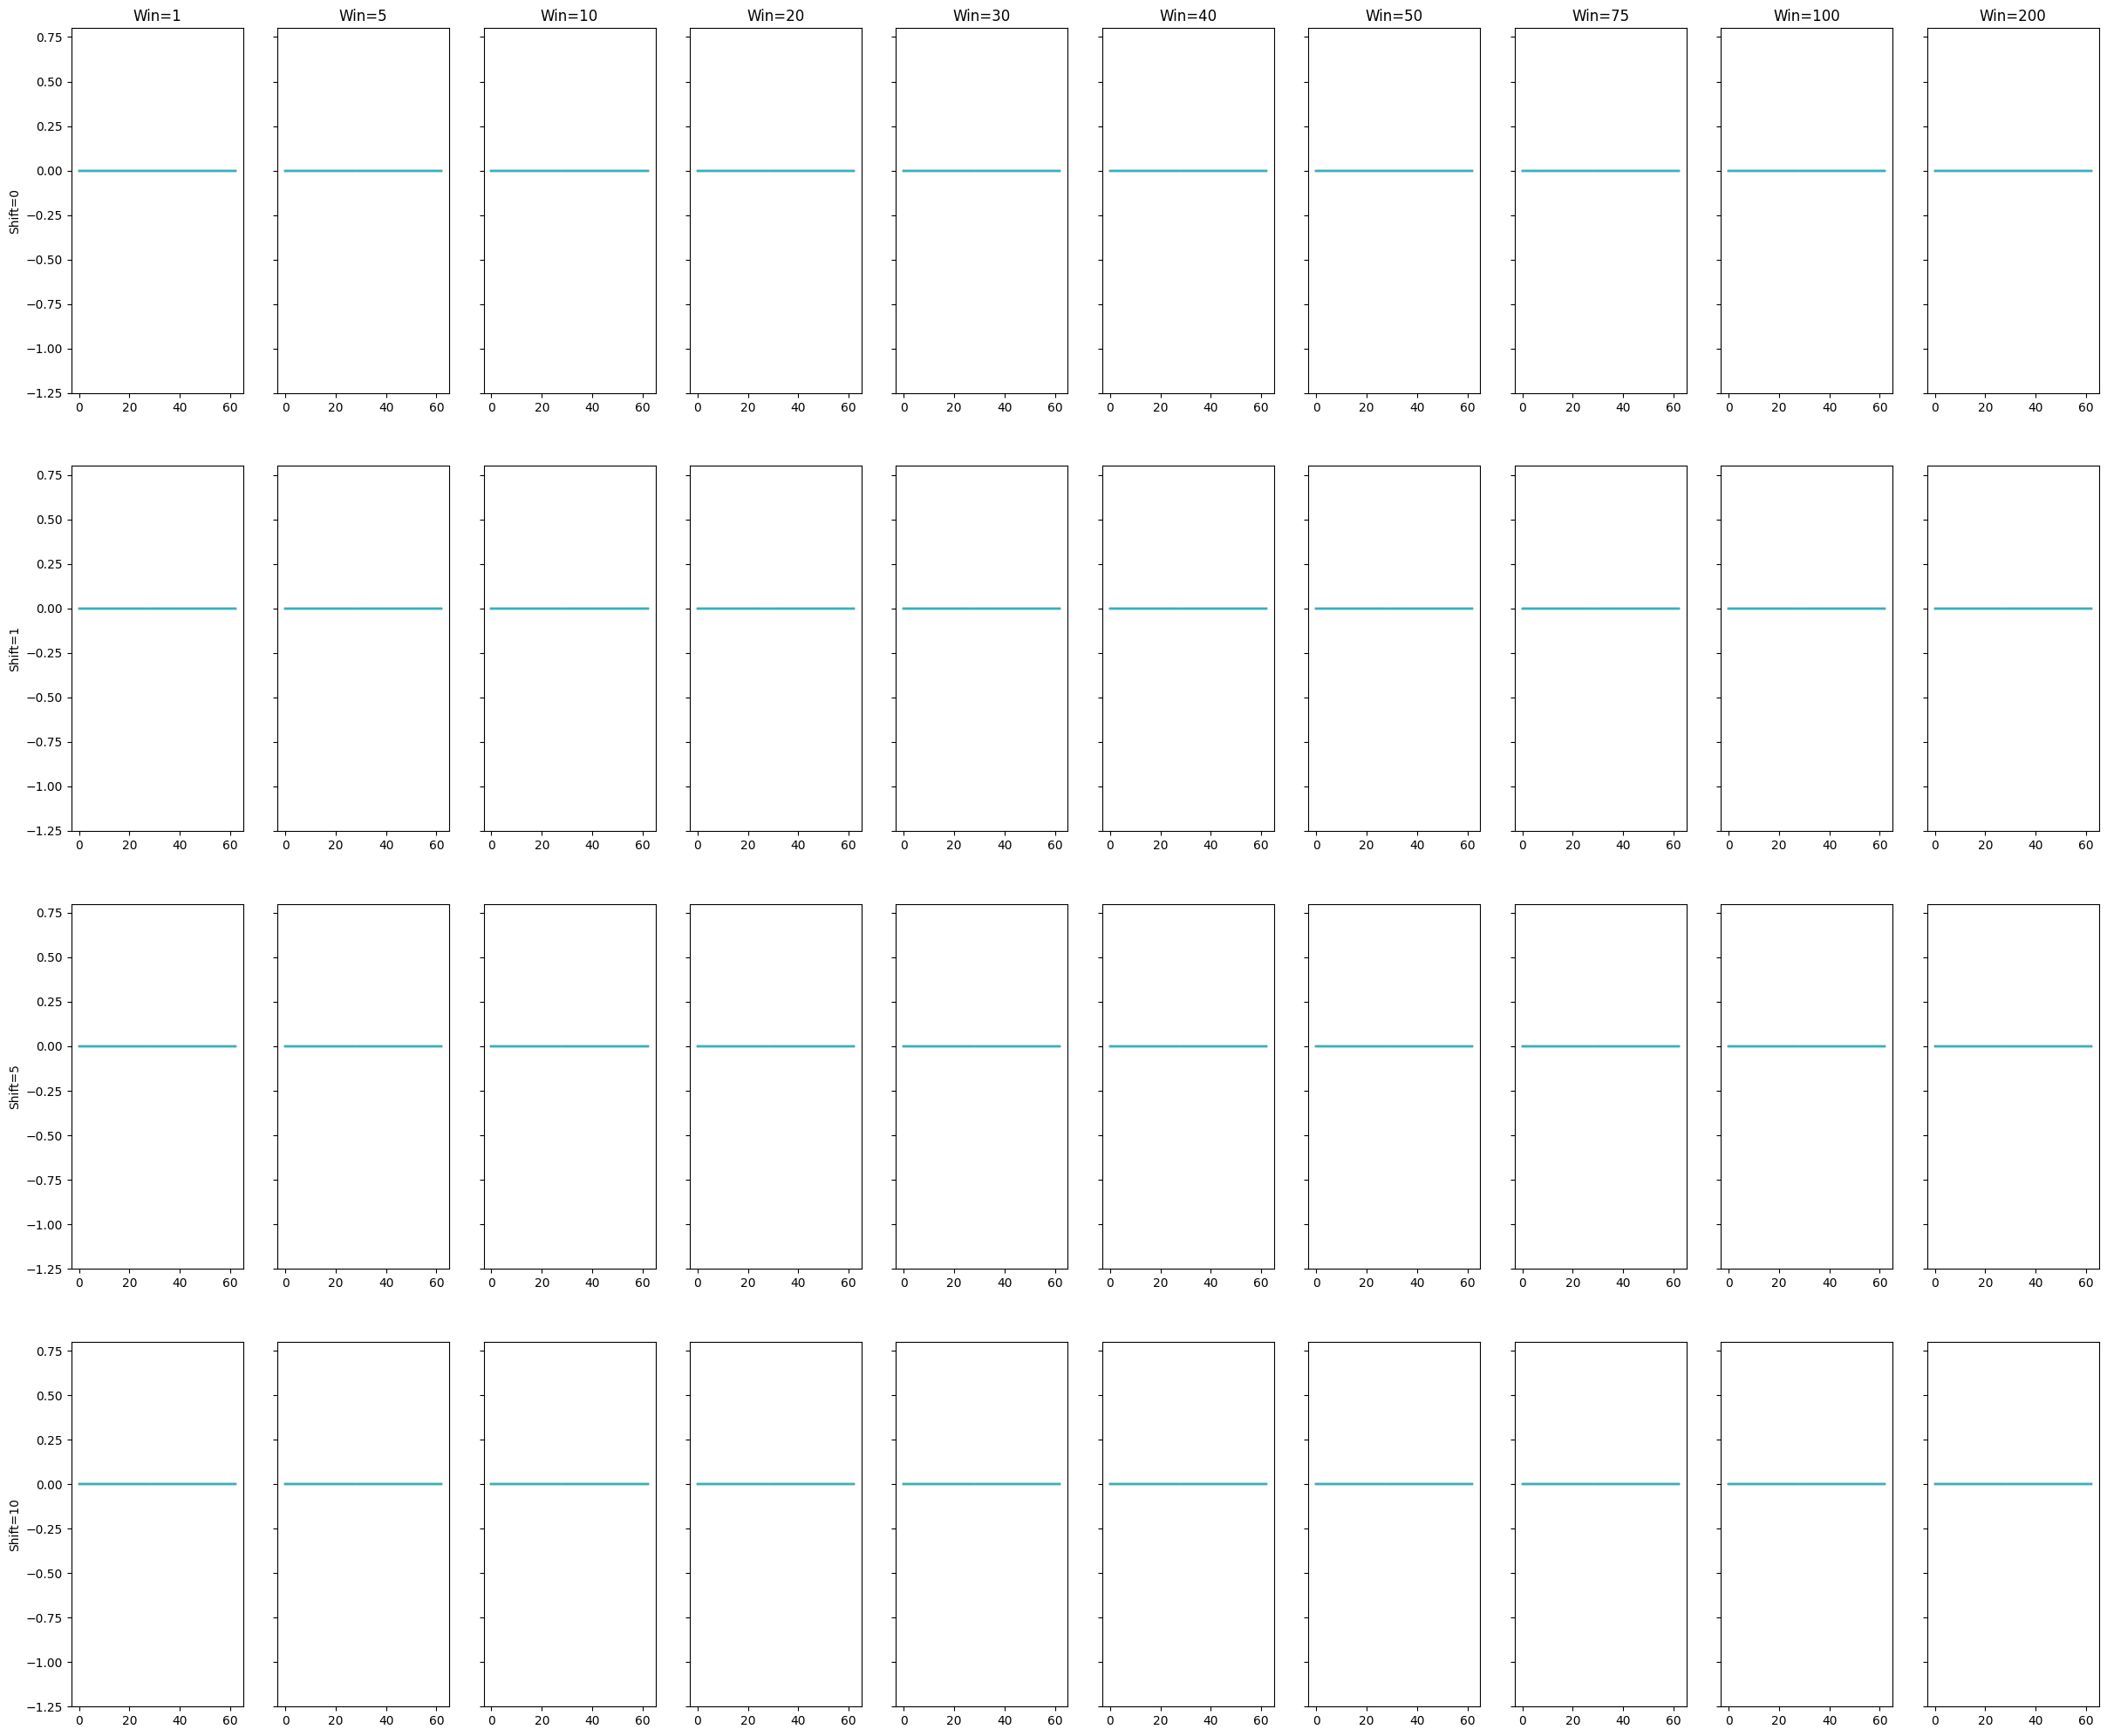

In [22]:
import pandas as pd
fig, ax = plt.subplots(4, len(wins),sharey=True,figsize=(30,25))

for i, shift in enumerate([0,1, 5, 10]):
    for j, w in enumerate(wins):
        for sent in sents:
        # plt.figure()
            d = pd.read_csv("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_cs_win_" + str(w)+ "_"+ str(sent) +"_" + str(shift)+ ".csv", header=None)
            d.columns = ["channels", "reg_r2", "pearson_r2"]

            avg_r2 = d['reg_r2'].to_numpy()
            pearson_r2 = d['pearson_r2'].to_numpy()
            # print(avg_r2.shape, pearson_r2.shape)

            # channels = d['channels'].to_numpy()
            # plt.figure()
            # ax[i, j].plot(channels, avg_r2, label=str(sent))
            ax[i, j].plot(avg_r2-pearson_r2, label=str(sent))
            ax[0, j].set_title(f"Win={w}")
            ax[i,0].set_ylabel(f"Shift={shift}")
            plt.ylim(-1.25, 0.8)
        # plt.xlabel("channels")
    # plt.title(f"Win = {w}" , fontsize=16)plt.legend()
        # plt.savefig("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_cs_win_" + str(w)+ ".png")
plt.show()

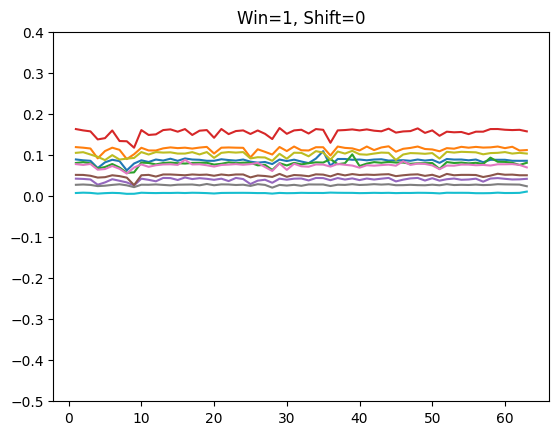

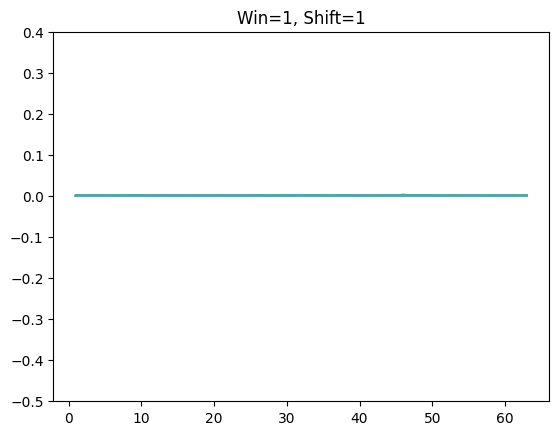

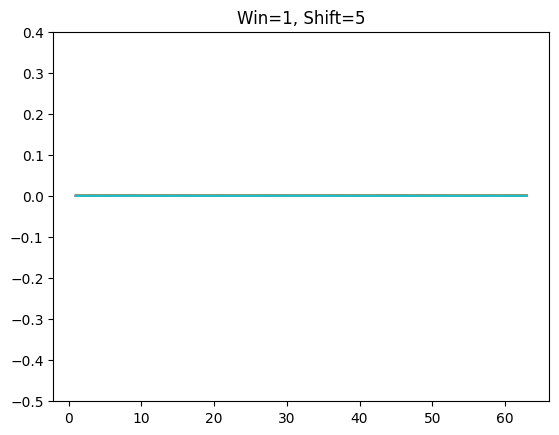

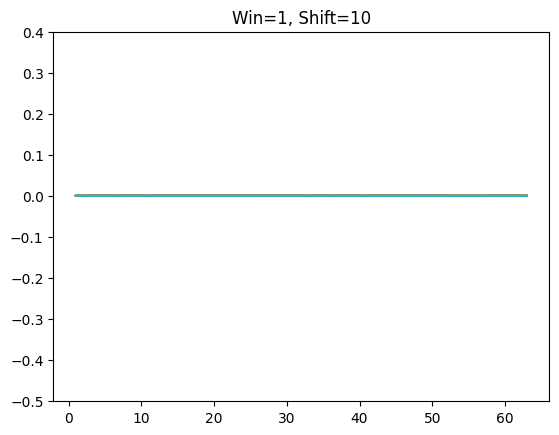

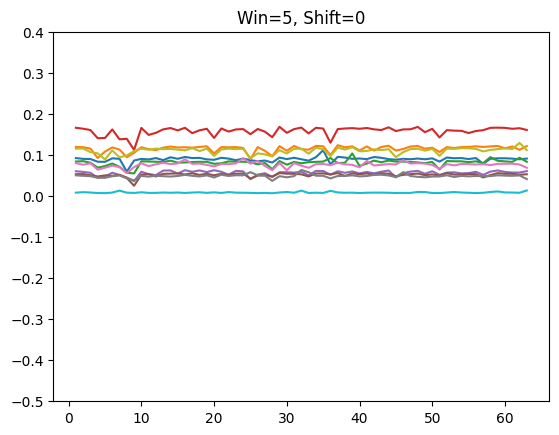

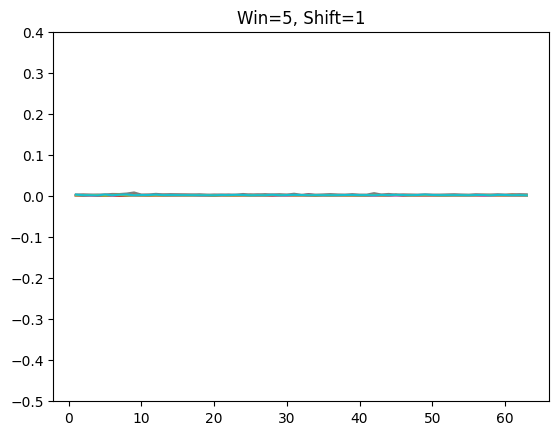

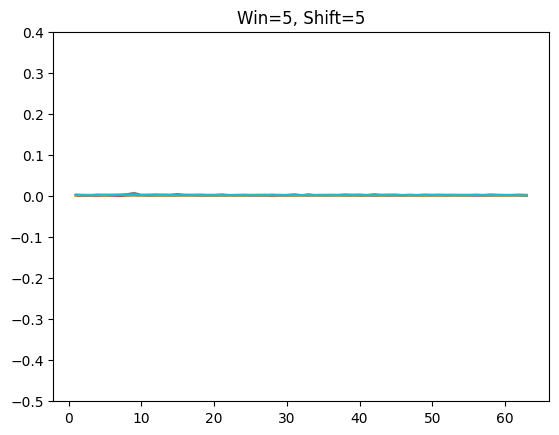

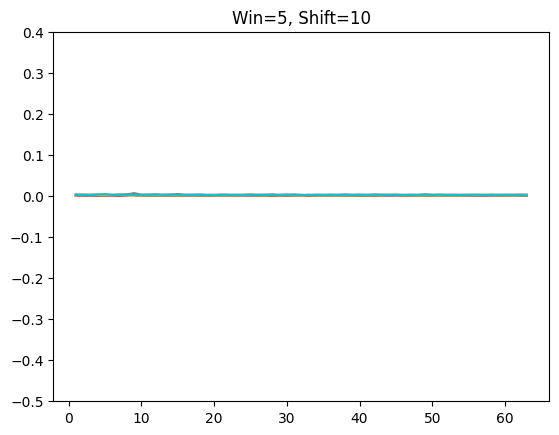

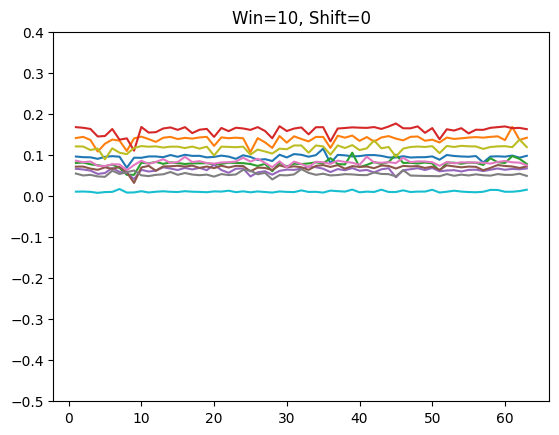

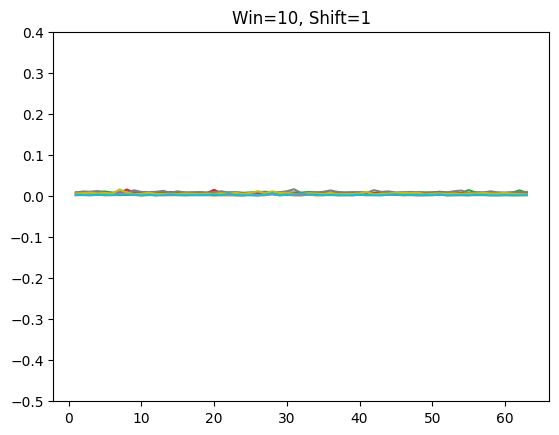

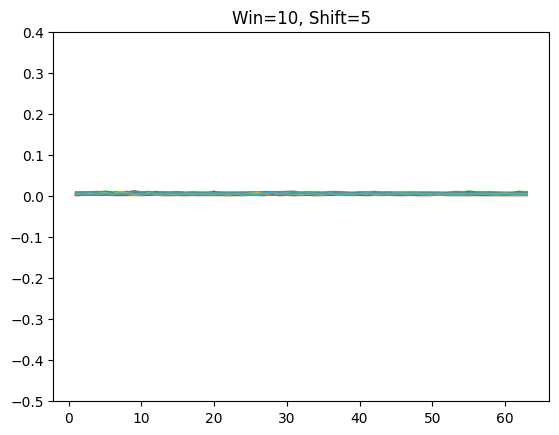

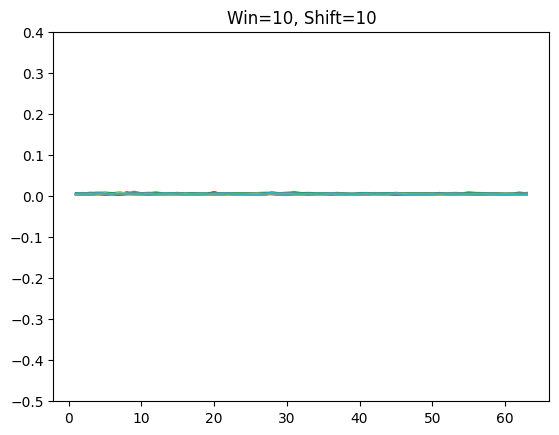

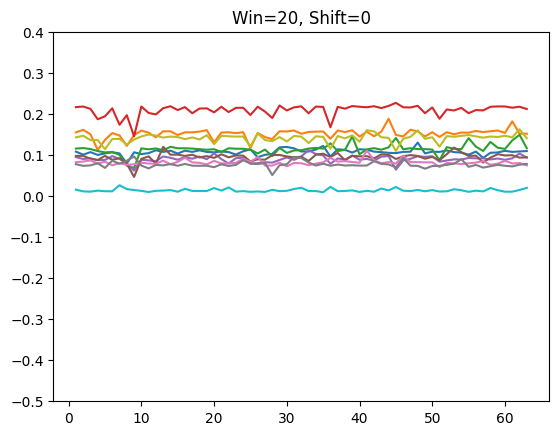

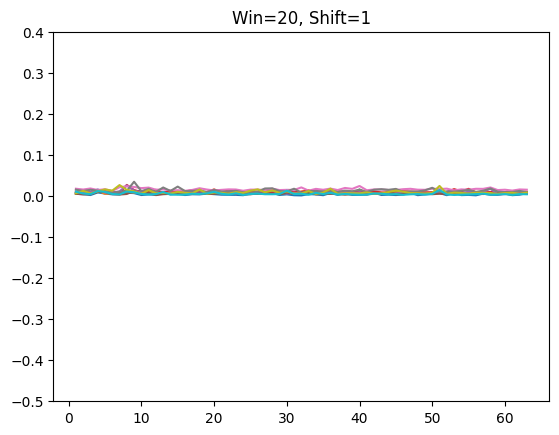

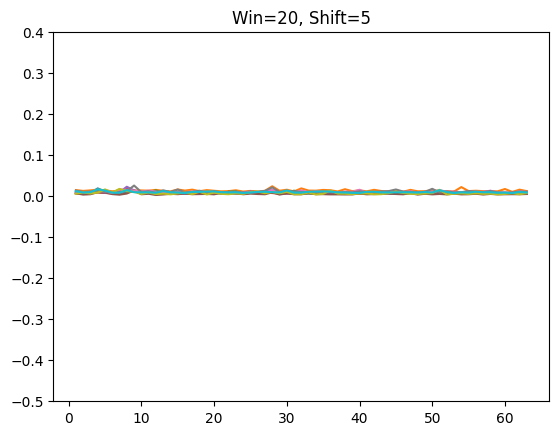

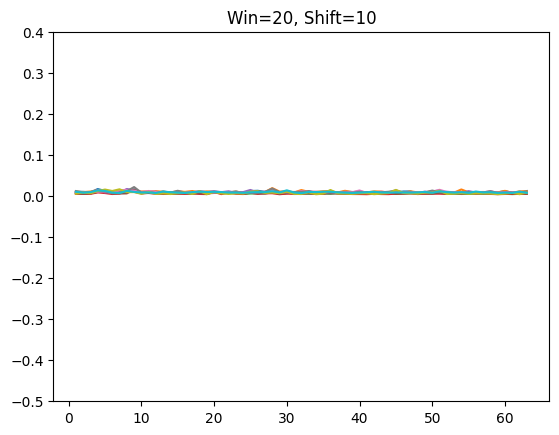

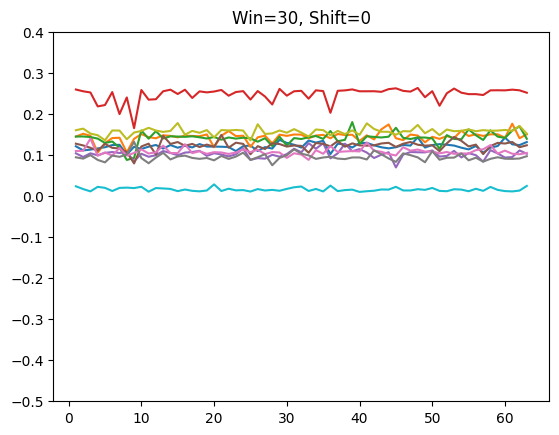

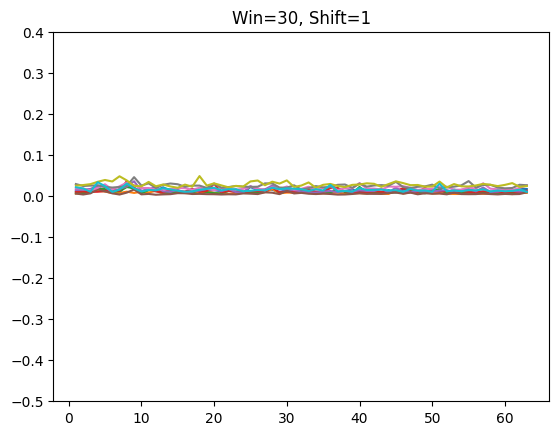

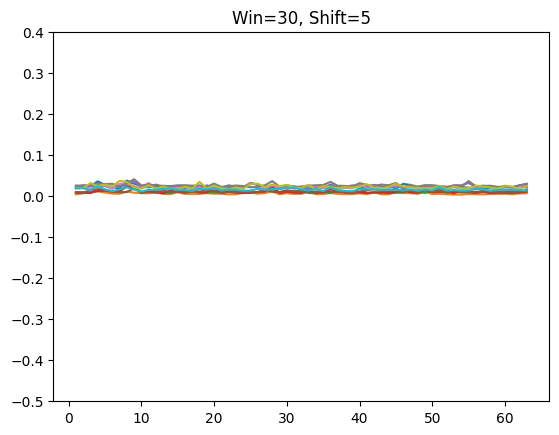

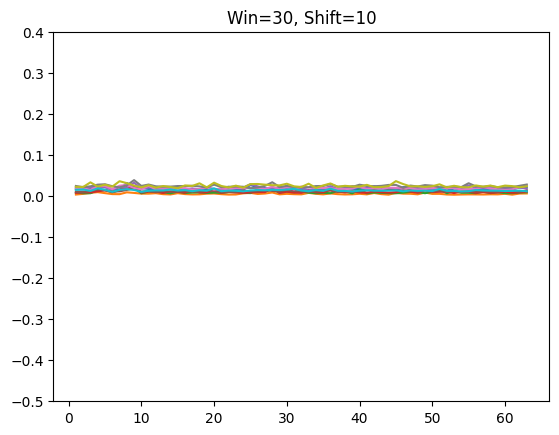

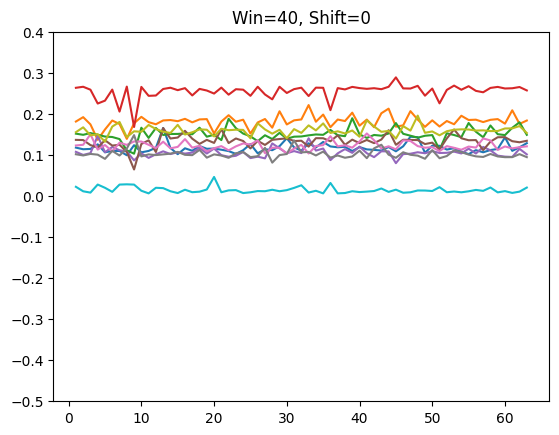

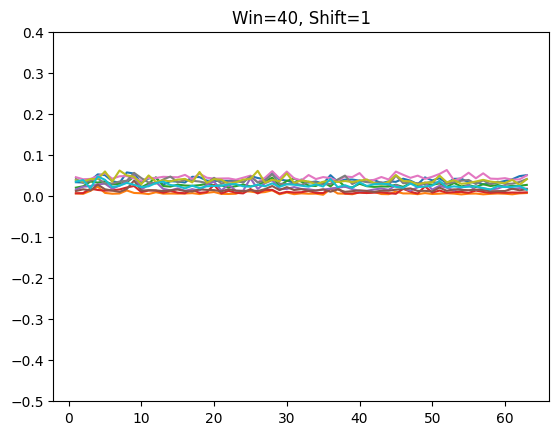

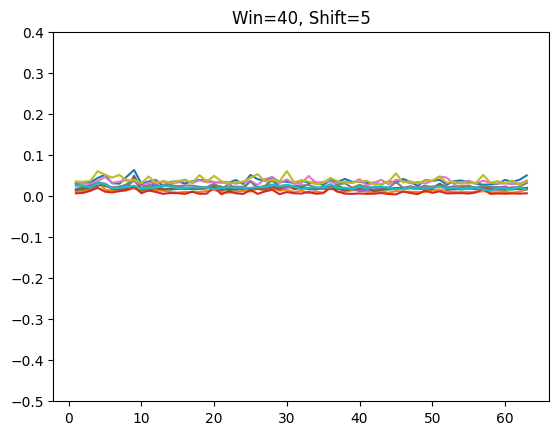

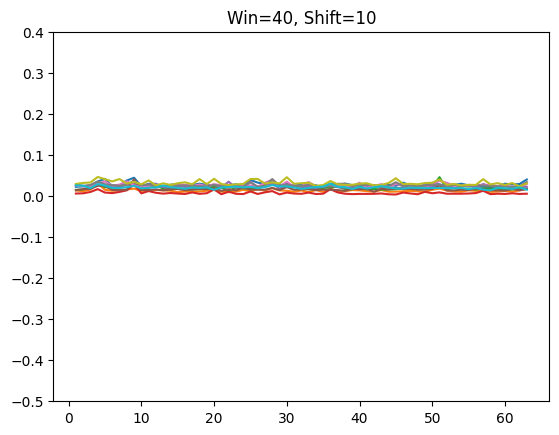

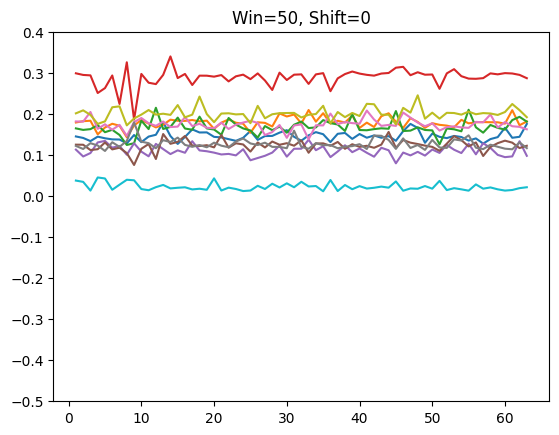

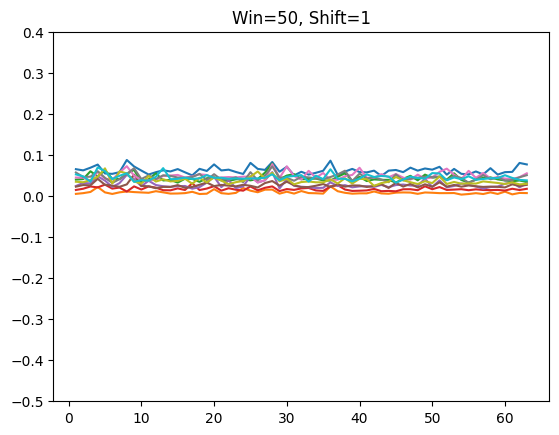

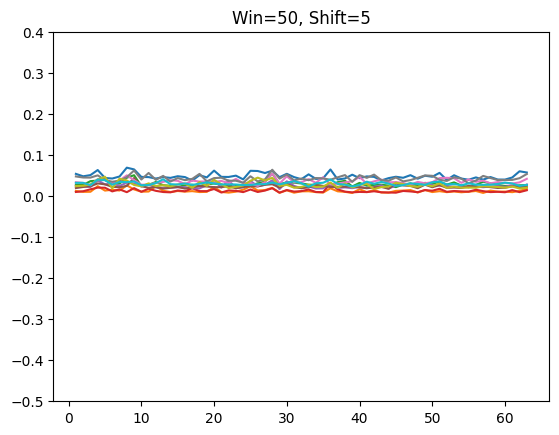

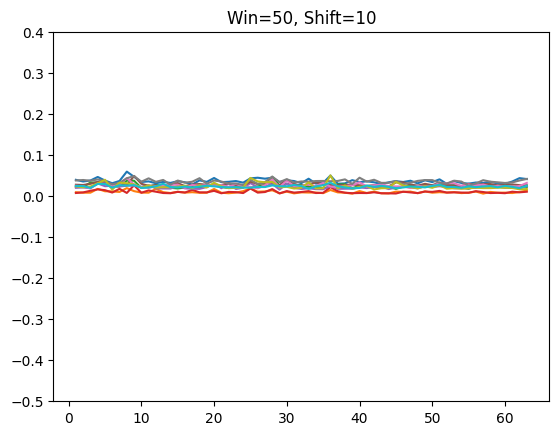

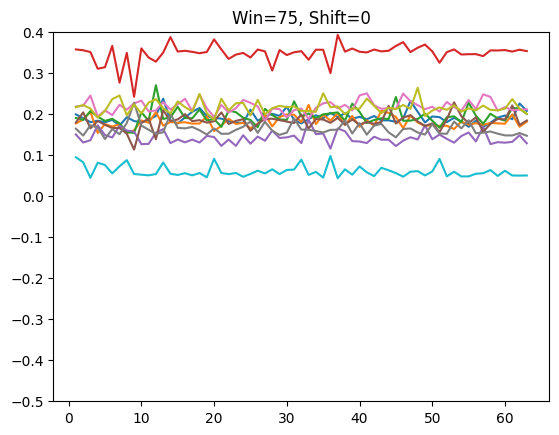

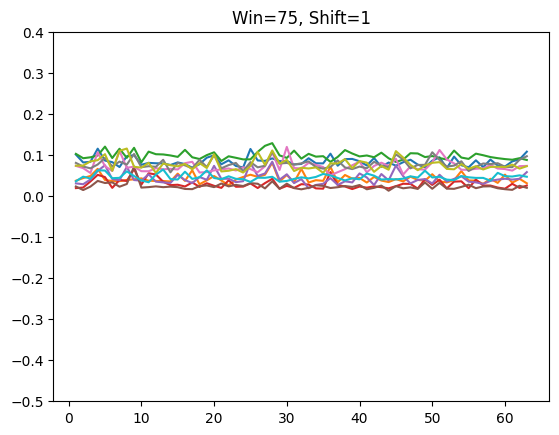

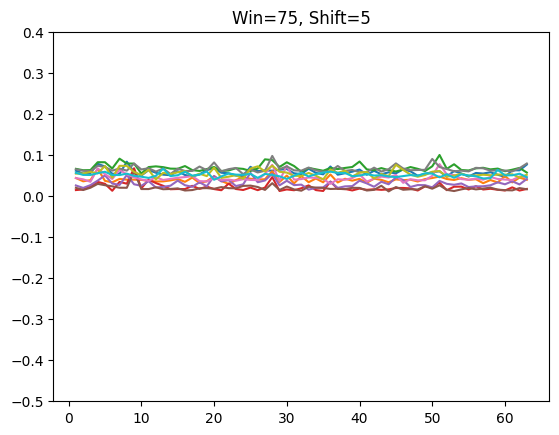

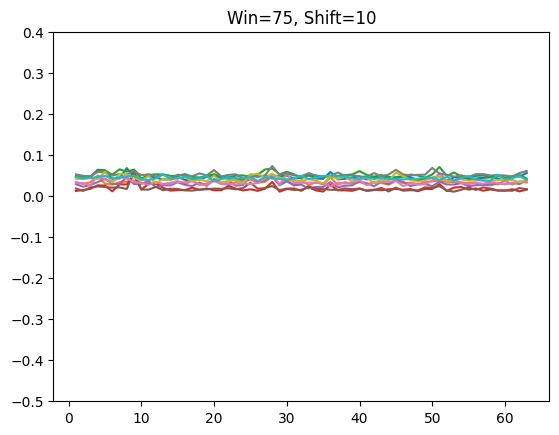

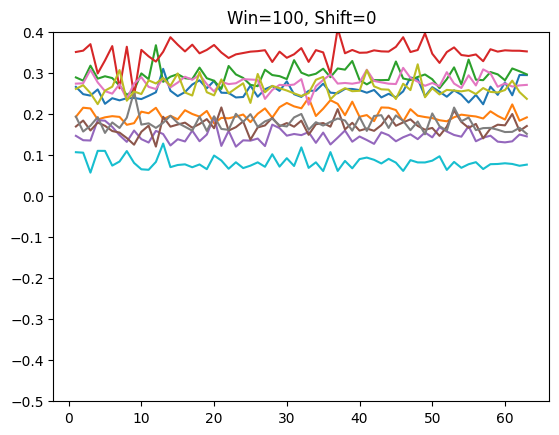

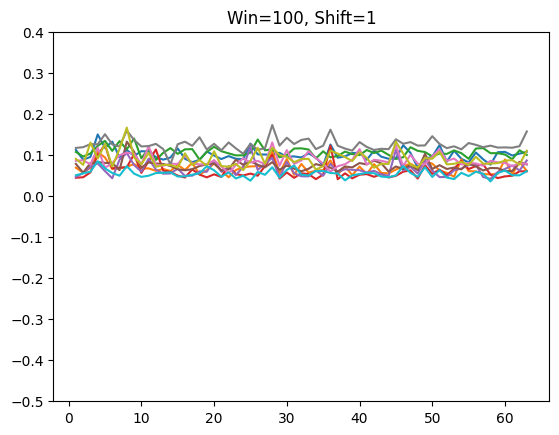

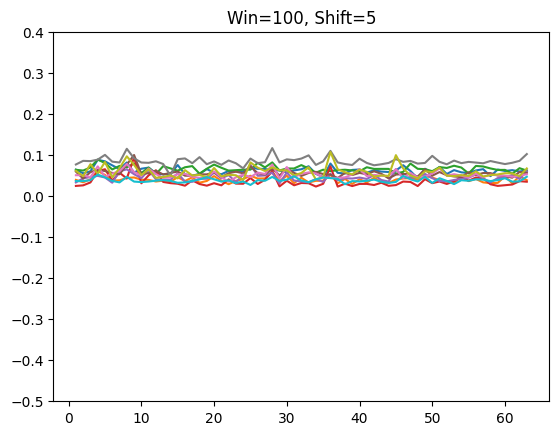

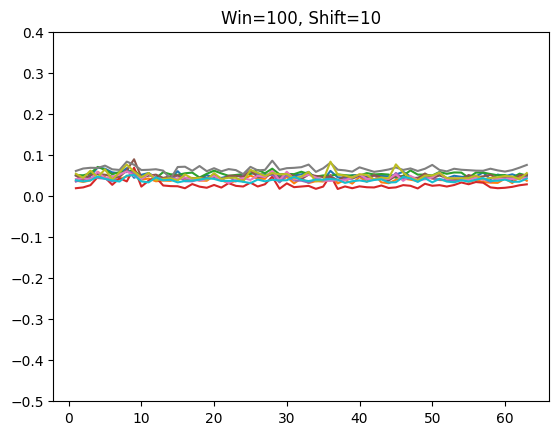

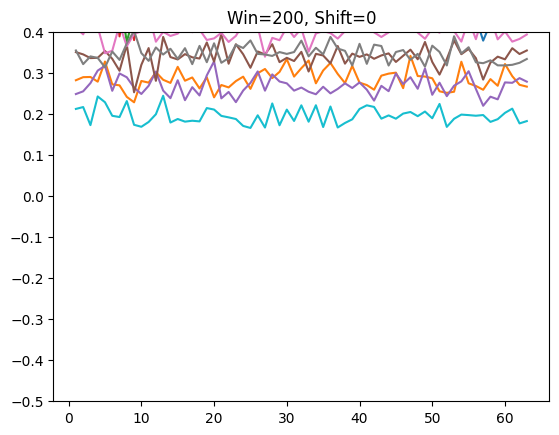

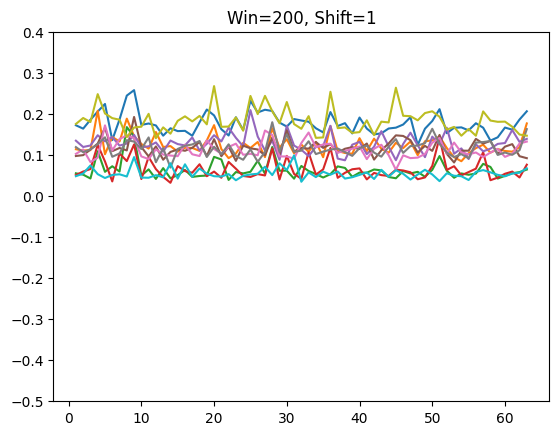

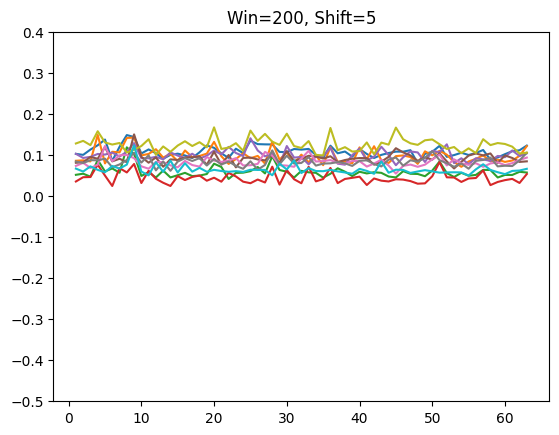

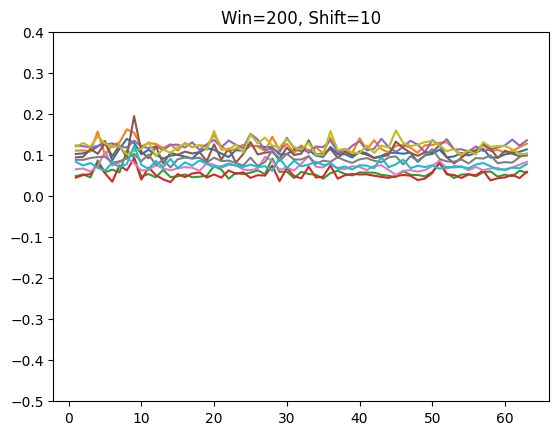

In [28]:
for j, w in enumerate(wins):
    for i, shift in enumerate([0,1, 5, 10]):
        plt.figure()
        for sent in sents:
            d = pd.read_csv("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_cs_win_" + str(w)+ "_"+ str(sent) +"_" + str(shift)+ ".csv", header=None)
            d.columns = ["channels", "reg_r2", "pearson_r2"]

            avg_r2 = d['reg_r2'].to_list()
            pearson_r2 = d['pearson_r2'].to_list()
            channels = d['channels'].to_list()
            # plt.figure()
            plt.plot(channels, avg_r2, label=str(sent))
            plt.title(f"Win={w}, Shift={shift}")
            # ax[i,j].set_ylabel(f"Shift={shift}")
            plt.ylim(-0.5, 0.4)
        # plt.xlabel("channels")
    # plt.title(f"Win = {w}" , fontsize=16)plt.legend()
        # plt.savefig("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_cs_win_" + str(w)+ ".png")
        plt.show()

In [ ]:
import pandas as pd

for sent in sents:
    d2 = pd.read_csv("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_loo_win_ms10_"+ str(sent) +".csv", header=None)
    d2.columns = ["channels", "avg_r2"]

    avg_R2 = d2['avg_r2'].to_list()
    channels = d2['channels'].to_list()
    
    plt.plot(channels, avg_R2 ,label=str(sent))
    plt.ylim(-1.25, 0.8)
plt.title("Correlation for sentences ms vs channels, w=10", fontsize=16)
plt.legend()
plt.show()

In [ ]:
import numpy as np

a = np.zeros(100)
b = np.zeros(100)
ind_a = np.random.randint(0,100,10)
ind_b = np.random.randint(0,100,10)

a[ind_a] = 1    
b[ind_b] = 1
res = stats.linregress(a,b)

res.rvalue**2

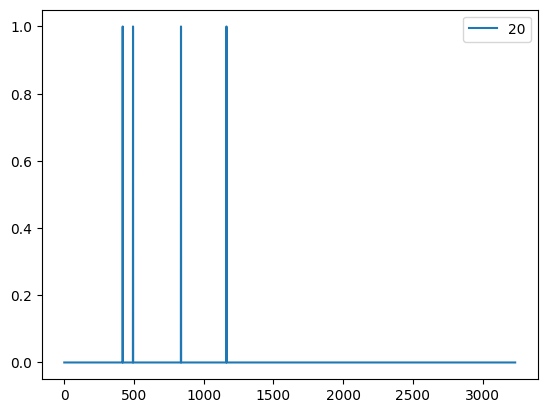

In [33]:
for w in [1]:
    for sent in [12]:
        data = neural_data.retrieve_spikes_count_for_all_trials(sent, w=w)

        for j in [20]:
            channel = data[j]
            # for shift in [1, 5, 10]:
            for i in range(1):
                plt.plot(channel[i], label=j)

    plt.legend()
    plt.show()